In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn

In [5]:
import warnings
warnings.simplefilter("ignore")

In [6]:
df = pd.read_csv("train.csv")
df.head(2)

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.0,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.5,2,Not_Canceled


In [14]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace = True)

In [13]:
df.shape

(21359, 18)

In [9]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

In [18]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [20]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

#### Our data is quite imbalanced

In [9]:
cat_cols= ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols= ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

#### DATA ANALYSIS

In [10]:
data = df.copy()

In [11]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### UNIVARIATE ANALYSIS

In [38]:
def num_plot_dist(df, num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]

    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues" )
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()

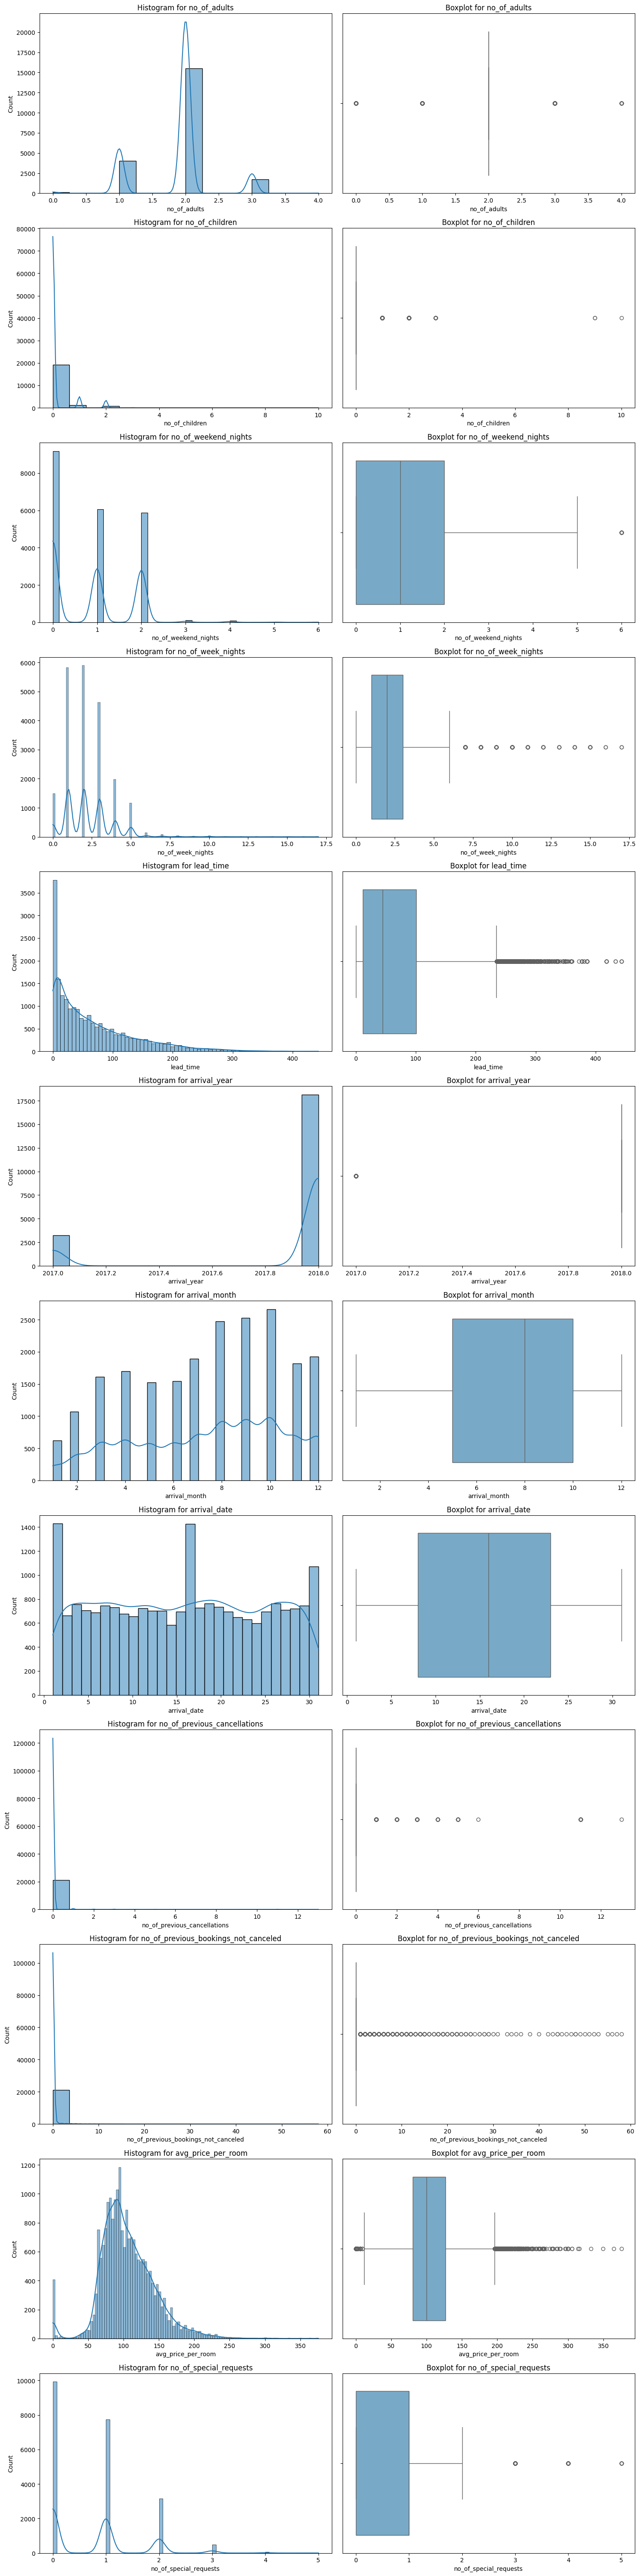

In [39]:
num_plot_dist(data , num_cols)

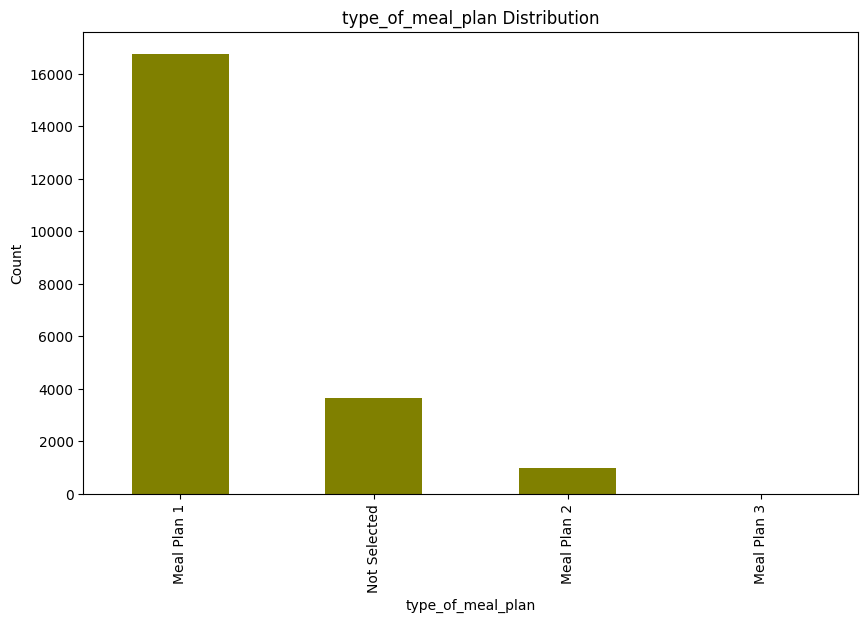

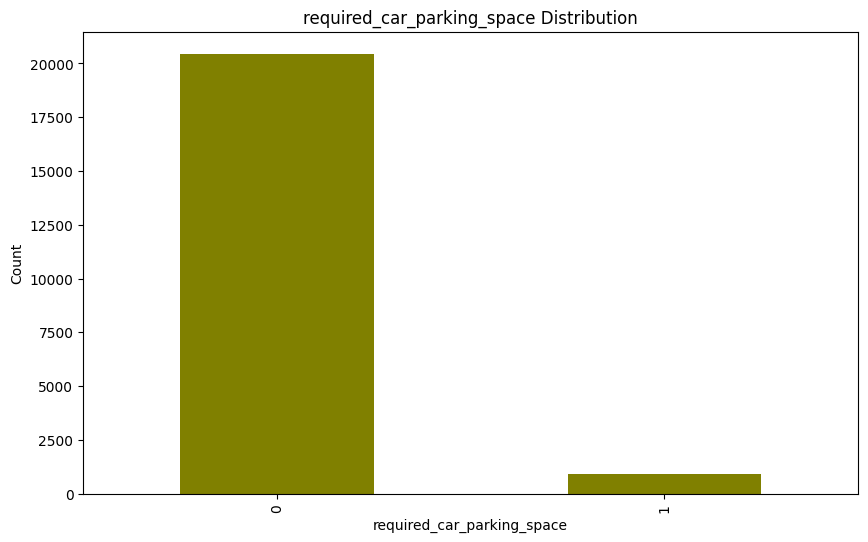

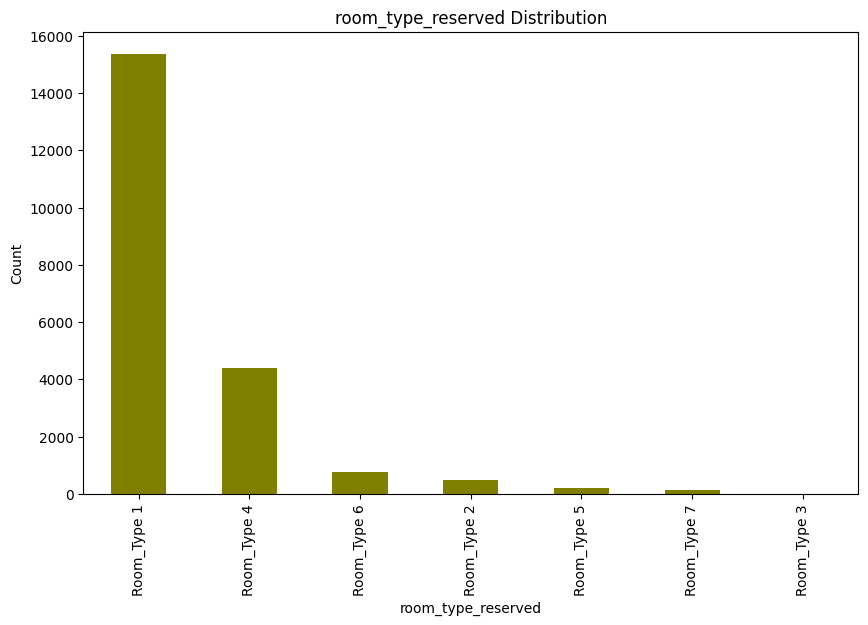

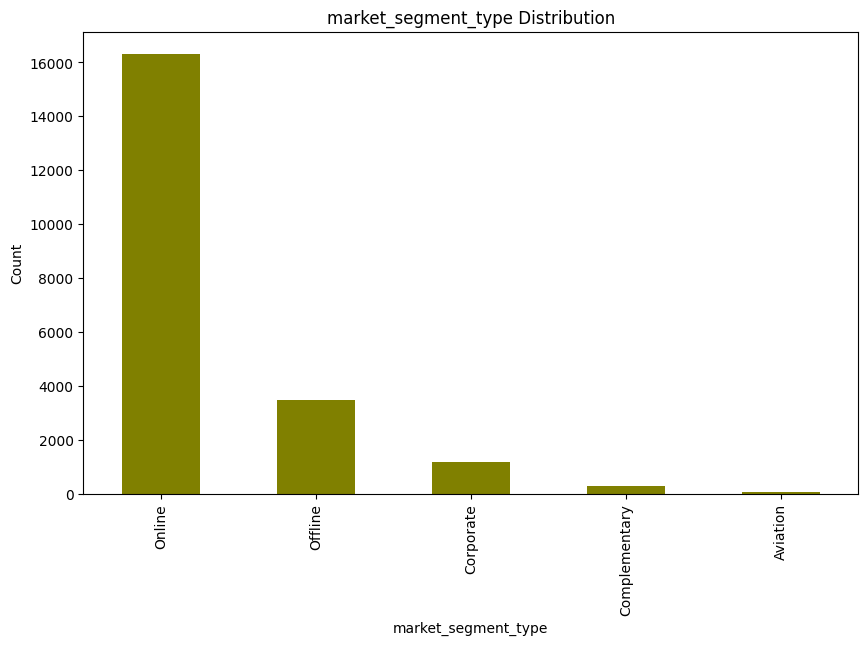

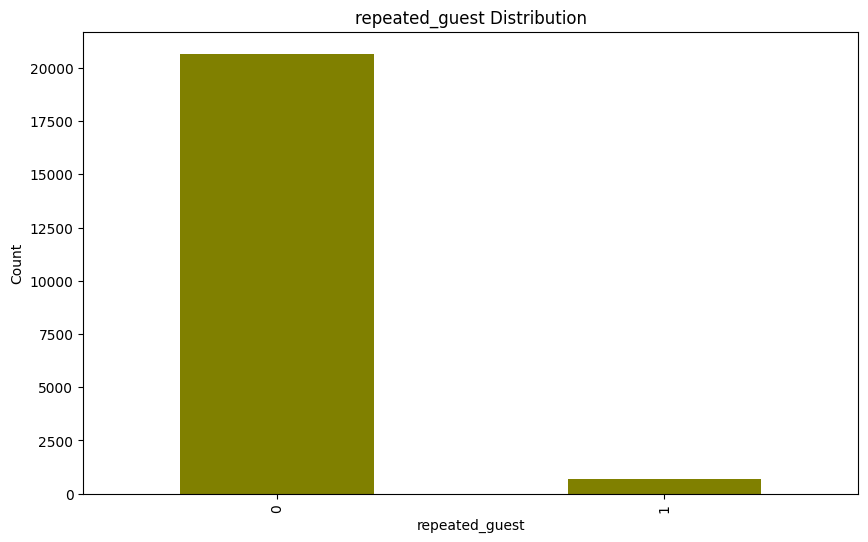

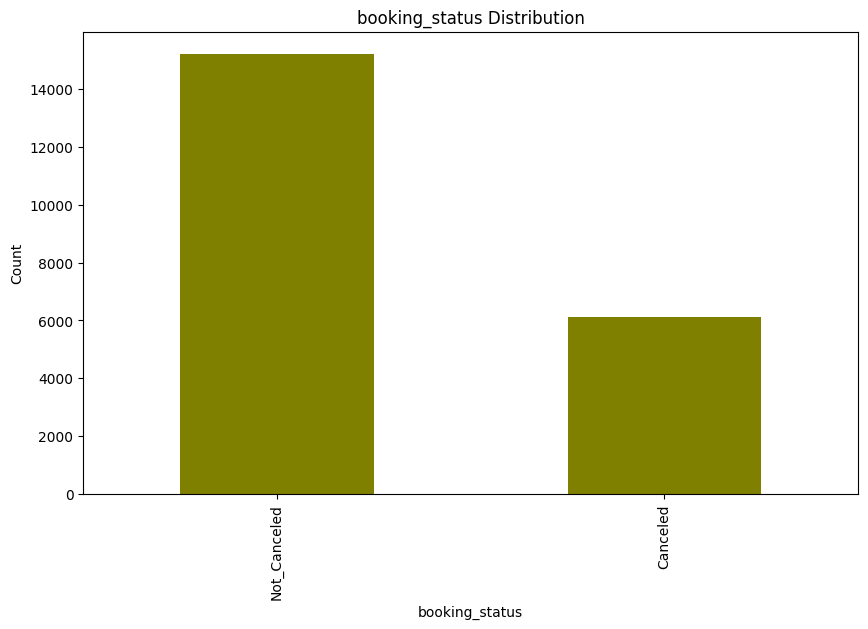

In [43]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind="bar" , color="olive")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

##### BIVARIATE ANALYSIS #

In [50]:
def plot_bivariate_num(df , target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target , y=column , ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column} Vs {target}")

    plt.tight_layout()
    plt.show()

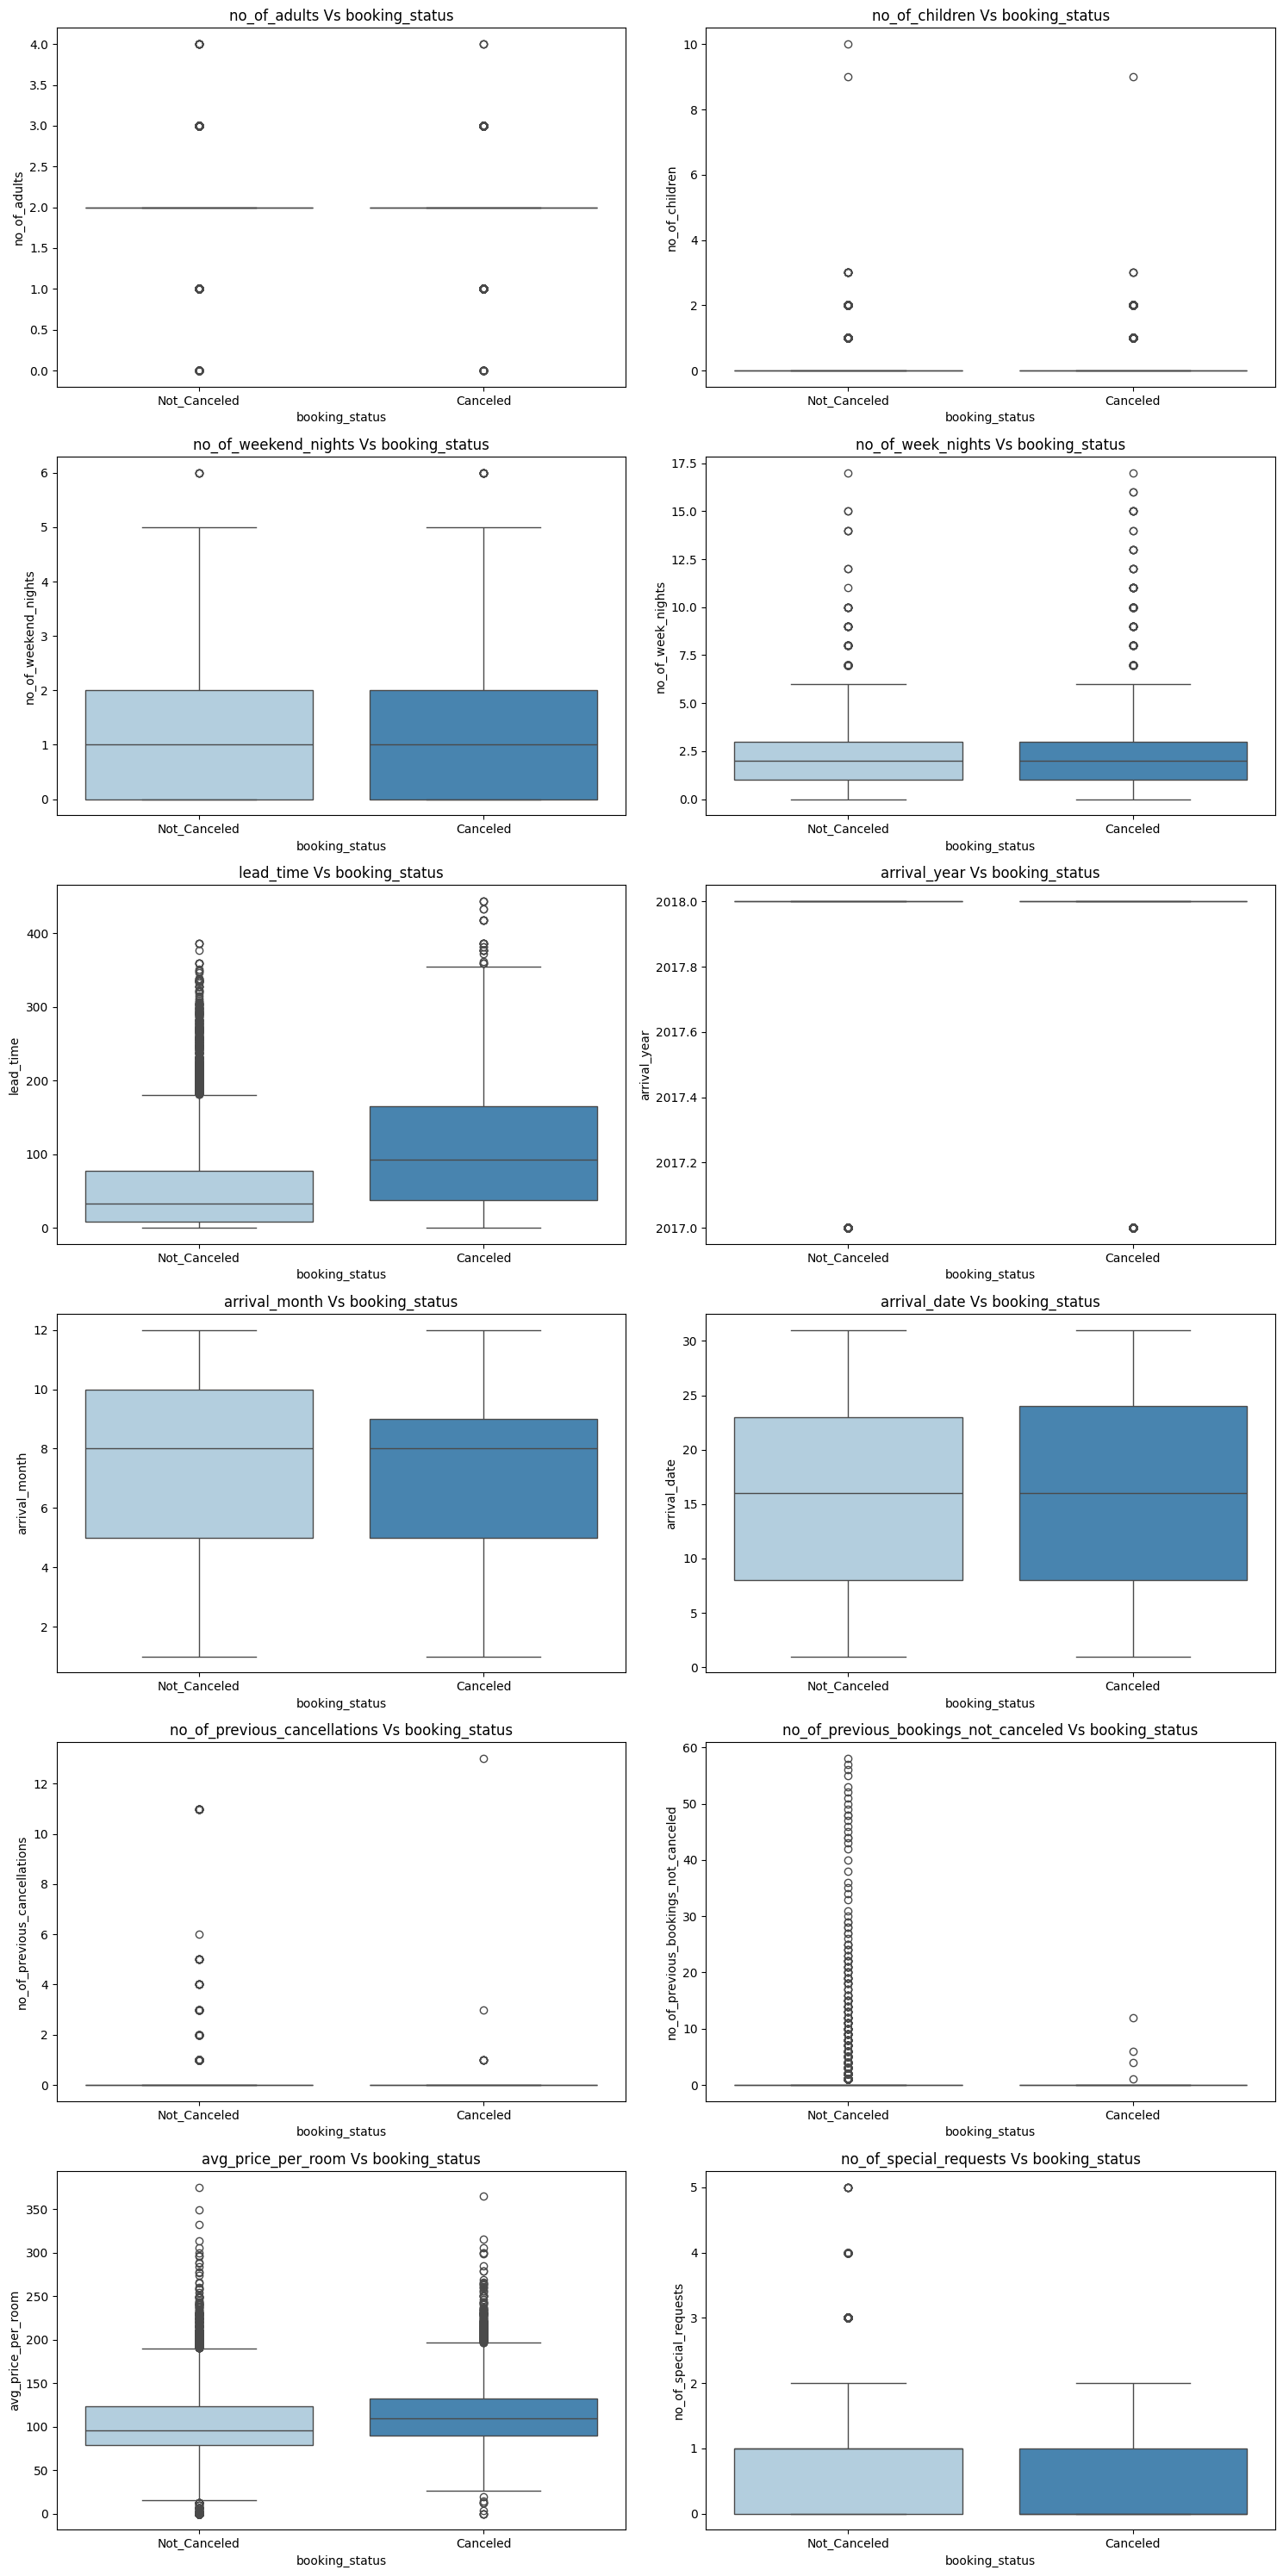

In [51]:
plot_bivariate_num(data , "booking_status" , num_cols)

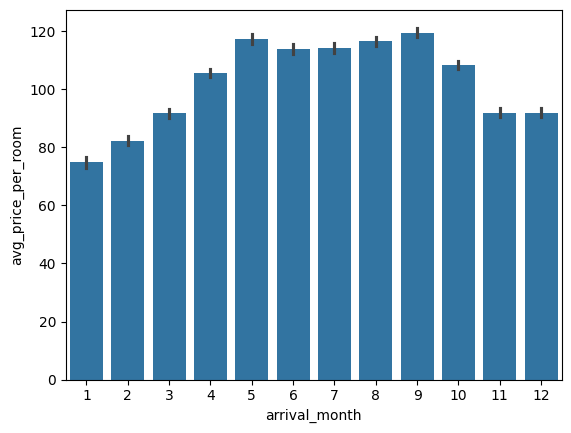

In [52]:
sns.barplot(x="arrival_month", y="avg_price_per_room" , data=data)
plt.show()

In [62]:
def plot_bivariate_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target , data=df , palette="Set3" , ax=axes[i])
        axes[i].set_title(f"{feature} Vs {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout
    plt.show()



   

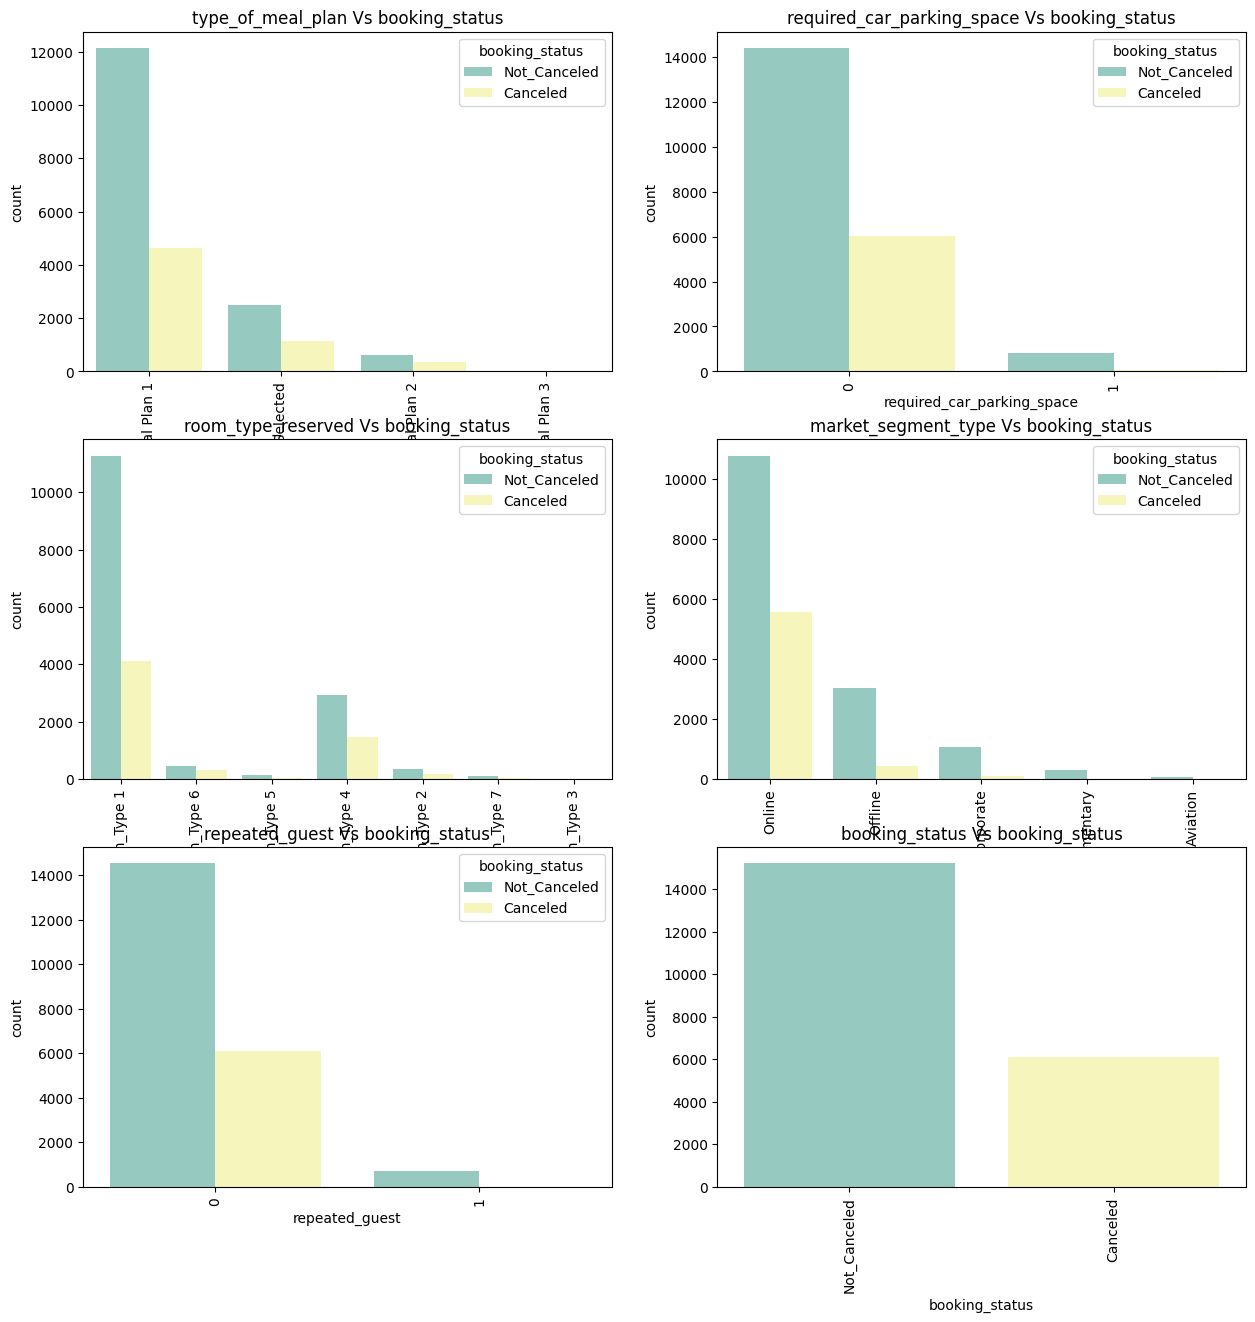

In [63]:
plot_bivariate_cat(data , "booking_status" , cat_cols)

#### DATA PROCESSING ###

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [3]:
##### Label Encoding ###
from sklearn.preprocessing import LabelEncoder


In [13]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [14]:
mappings
    

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [17]:
#### Multicollinearity ########

In [18]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------------ --------------------- 4.5/9.8 MB 27.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 28.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [22]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


In [23]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [ ]:
###### Our data doesn't exhibit multicollinearity

In [24]:
corr = df.corr()

<Axes: >

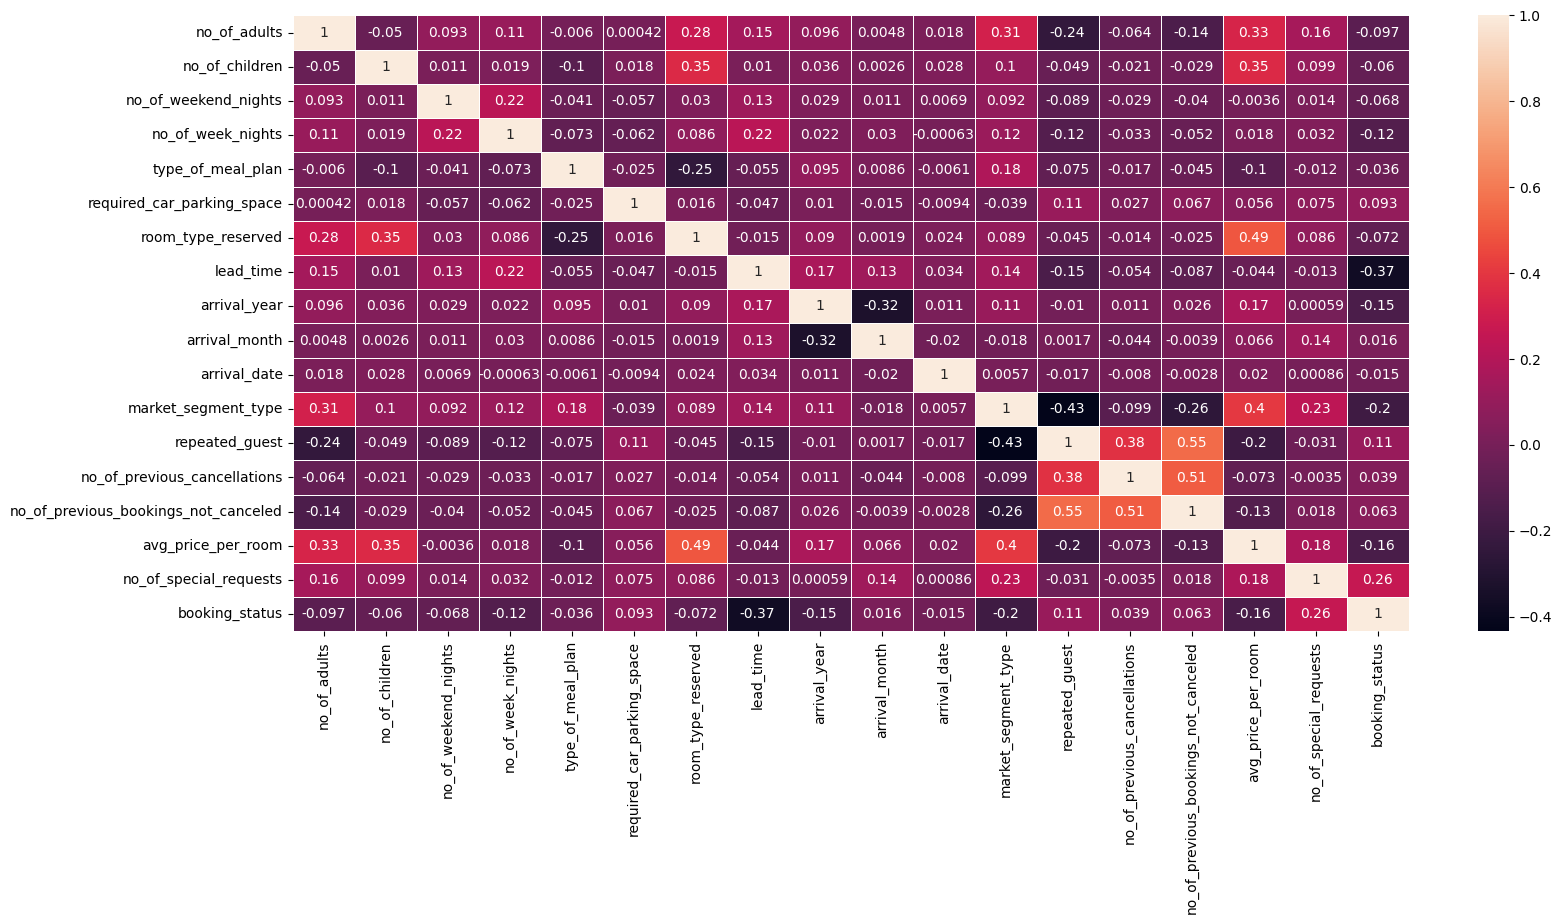

In [28]:
plt.figure(figsize=(18,8))
sns.heatmap(corr , annot=True , linewidths=0.5)

In [29]:
##### Skewness #####

In [35]:
skewness = df.skew()

In [36]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [33]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [37]:
#### Imbalanced Data

In [47]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [44]:
X = df.drop(columns= 'booking_status')
y = df["booking_status"]

In [45]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [49]:
y.info()

<class 'pandas.core.series.Series'>
Index: 21359 entries, 0 to 29019
Series name: booking_status
Non-Null Count  Dtype
--------------  -----
21359 non-null  int64
dtypes: int64(1)
memory usage: 333.7 KB


In [50]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(random_state=42)

x_res , y_res = smote.fit_resample(X,y)

In [54]:
pd.Series(y_res)

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [55]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [56]:
balanced_df = pd.DataFrame(x_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [58]:
balanced_df.shape

(30462, 18)

In [ ]:
#### dfb = Balanced data frame ####

dfb = balanced_df.copy()

In [60]:
dfb.shape

(30462, 18)

In [61]:
#### Feature Selection ###

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
X = dfb.drop(columns= 'booking_status')
y = dfb["booking_status"]

In [64]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [66]:
feature_importance = model.feature_importances_

In [67]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [70]:
top_features_importance_df = feature_importance_df.sort_values(by='importance' , ascending=False)

In [72]:
top_10_features = top_features_importance_df['feature'].head(10).values

top_10_df = dfb[top_10_features.tolist() + ['booking_status']]

In [73]:
top_10_df.shape

(30462, 11)

In [74]:
df = top_10_df.copy()

In [75]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 4.7/150.0 MB 28.6 MB/s eta 0:00:06
   --- ------------------------------------ 11.5/150.0 MB 30.5 MB/s eta 0:00:05
   ----- ---------------------------------- 18.9/150.0 MB 32.1 MB/s eta 0:00:05
   ------- -------------------------------- 26.5/150.0 MB 32.8 MB/s eta 0:00:04
   --------- ------------------------------ 33.8/150.0 MB 33.1 MB/s eta 0:00:04
   ---------- ----------------------------- 41.2/150.0 MB 33.3 MB/s eta 0:00:04
   ------------ --------------------------- 48.5/150.0 MB 33.5 MB/s eta 0:00:04
   -------------- ------------------------- 55.8/150.0 MB 33.6 MB/s eta 0:00:03
   ---------------- ----------------------- 62.7/150.0 MB 33.7 MB/s eta 0:00:03
   ------------------ --------------------- 69.7/150.0 MB 33.8 MB/s eta 0:00:03
   -------------------- ------------------- 77.1/150.0 MB 33.8 MB/s eta 0:00:03
   ---------------------- ----------------- 84.4/1


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [77]:
X = df.drop(columns= 'booking_status')
y = df["booking_status"]

In [78]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [79]:
classifiers = {
    'Random_Forest' : RandomForestClassifier(random_state=42),
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'Gradient_Boosting' : GradientBoostingClassifier(random_state=42),
    'Support_vector_classifier' : SVC(random_state=42),
    'Decision_tree' : DecisionTreeClassifier(random_state=42),
    'KNN' : KNeighborsClassifier(),
    'Naive_Bayes' : GaussianNB(),
    'XGboost' : XGBClassifier(random_state=42),
    'Adaboost' : AdaBoostClassifier(random_state=42),
    'LGBM' : LGBMClassifier(random_state=42)
}

In [80]:
metrics = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'F1_Score' : []
}

In [81]:
for model_name , classifier in classifiers.items():
    classifier.fit(X_train , y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    recall = recall_score(y_test , y_pred)
    f1 = f1_score(y_test , y_pred)

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1_Score'].append(f1)

In [82]:
metrics_df = pd.DataFrame(metrics)

In [84]:
metrics_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Random_Forest,0.891843,0.893312,0.891857,0.892584
1,Logistic_Regression,0.774003,0.802646,0.731270,0.765297
2,Gradient_Boosting,0.836862,0.821362,0.864169,0.842222
3,Support_vector_classifier,0.720827,0.730394,0.706840,0.718424
4,Decision_tree,0.833908,0.843000,0.823779,0.833278
5,KNN,0.779091,0.856788,0.674267,0.754648
6,Naive_Bayes,0.773511,0.803738,0.728339,0.764183
7,XGboost,0.875595,0.870513,0.884691,0.877544
8,Adaboost,0.805186,0.802053,0.814332,0.808146
9,LGBM,0.865419,0.851124,0.888274,0.869302


In [85]:
##### Training the RandomForest Model ###

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [87]:
X = df.drop(columns= 'booking_status')
y = df["booking_status"]

In [88]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [89]:
rf = RandomForestClassifier(random_state=42)

In [90]:
params_dist = {
    'n_estimators' :randint(100,500) ,
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False]
}

In [92]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [93]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C16A28AE90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C1A8E24180>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C16A28B110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C16A0CF0E0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [94]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [95]:
best_rf_model = random_search.best_estimator_

In [96]:
y_pred = best_rf_model.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred)

In [98]:
accuracy

0.8911866075824717

In [99]:
precision

0.888351080993869

In [100]:
recall

0.896742671009772

In [101]:
f1

0.8925271518884746

In [ ]:
### Saving and Loading this model ###

In [103]:
import joblib

In [104]:
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [105]:
loaded_model = joblib.load('random_forest.pkl')

In [107]:
X_train[10:11]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
27758,135,0,75.149819,10,28,4,4,1,0,0


In [110]:
new_data = np.array([135,	0,	75.149819,	10,	28,	4,	4,	1,	0,	0]).reshape(1,-1)

In [111]:
loaded_model.predict(new_data)

array([0])

In [2]:
import sys
print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\\python313.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0', 'c:\\Users\\karth\\Documents\\MLOps Projects\\MLOPS-PROJECT-1\\venv', '', 'c:\\Users\\karth\\Documents\\MLOps Projects\\MLOPS-PROJECT-1\\venv\\Lib\\site-packages', 'c:\\Users\\karth\\Documents\\MLOps Projects\\MLOPS-PROJECT-1\\venv\\Lib\\site-packages\\win32', 'c:\\Users\\karth\\Documents\\MLOps Projects\\MLOPS-PROJECT-1\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\karth\\Documents\\MLOps Projects\\MLOPS-PROJECT-1\\venv\\Lib\\site-packages\\Pythonwin']


In [3]:
pip list

Package                  Version     Editable project location
------------------------ ----------- -------------------------------------------------------
asttokens                3.0.0
cachetools               5.5.2
certifi                  2025.1.31
charset-normalizer       3.4.1
colorama                 0.4.6
comm                     0.2.2
contourpy                1.3.1
cycler                   0.12.1
debugpy                  1.8.13
decorator                5.2.1
executing                2.2.0
fonttools                4.56.0
google-api-core          2.24.2
google-auth              2.38.0
google-cloud-core        2.4.3
google-cloud-storage     3.1.0
google-crc32c            1.7.1
google-resumable-media   2.7.2
googleapis-common-protos 1.69.2
idna                     3.10
imbalanced-learn         0.13.0
imblearn                 0.0
ipykernel                6.29.5
ipython                  9.0.2
ipython_pygments_lexers  1.1.1
jedi                     0.19.2
joblib                   1.4